In [1]:
from pmdarima import auto_arima
import warnings
import prediction_plots2 as pplot
import mse
import functions as f
import data_testing as dt
import data_prep as d
import pickle
import pandas as pd
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
bike_df = f.import_cleaned()

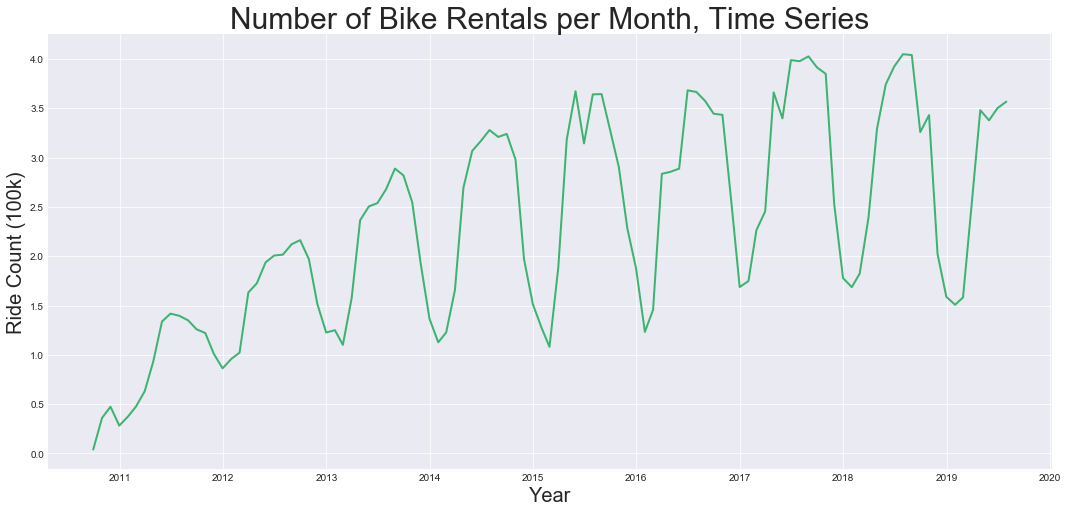

In [3]:
pplot.initial_plot(bike_df)

In [4]:
train_df, test_df = f.train_split(bike_df)

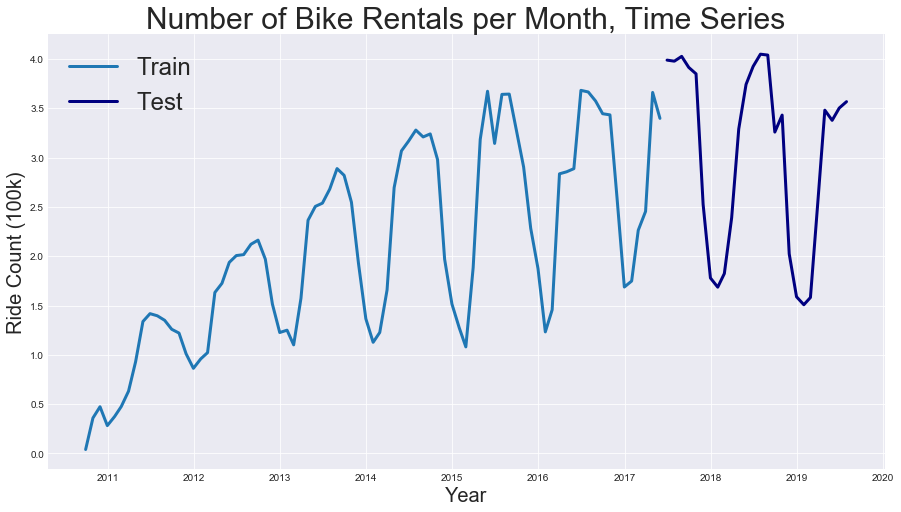

In [5]:
pplot.split_plot(train_df, test_df)

<Figure size 432x288 with 0 Axes>

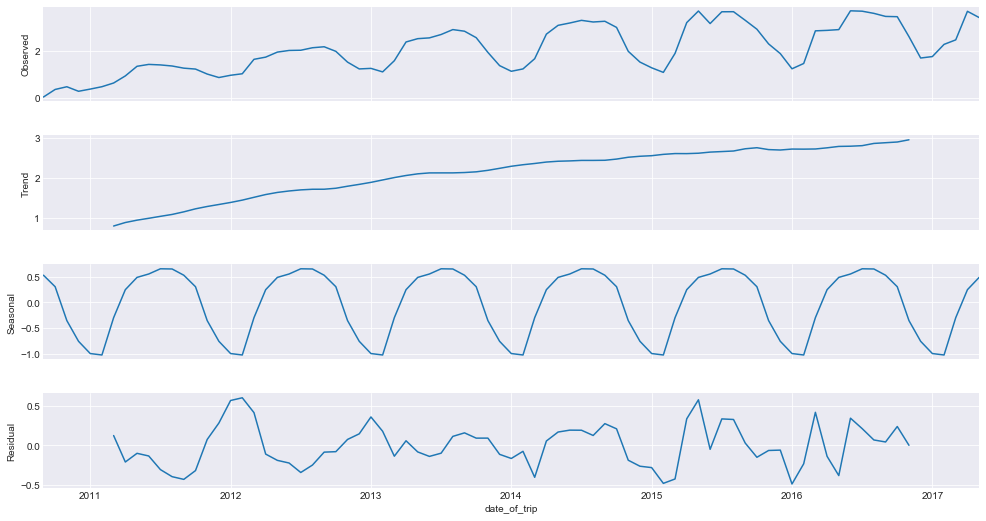

In [6]:
pplot.decomposition(train_df)

## Original 

The purpose of this test is to determine the stationarity and autocorrelarity
 of the original timeseries.


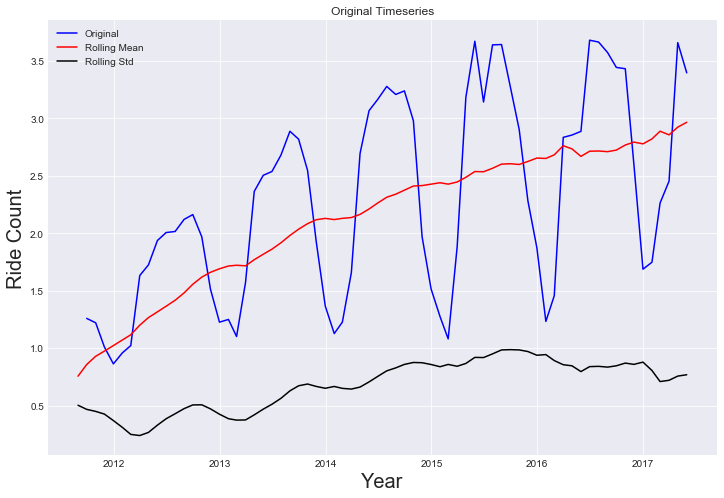

Results of Dickey-Fuller Test:
Test Statistic                 -4.065344
p-value                         0.001104
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


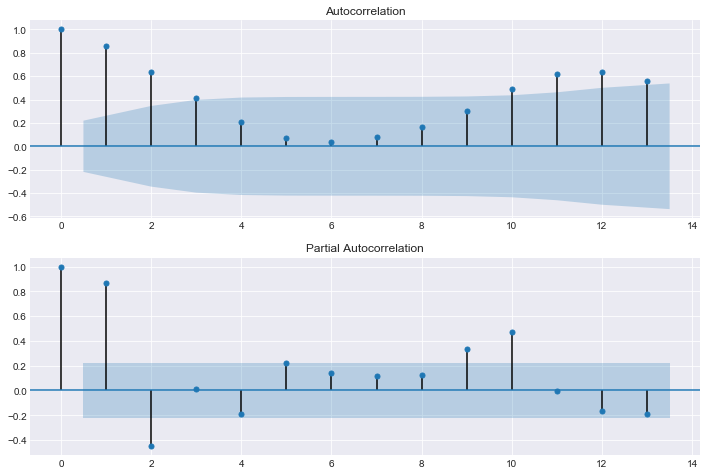

In [7]:
dt.stationarity_autocorrelation_test_original(train_df)

## First Order Difference

The purpose of this test is to determine the stationarity and autocorrelarity
 of the first difference.


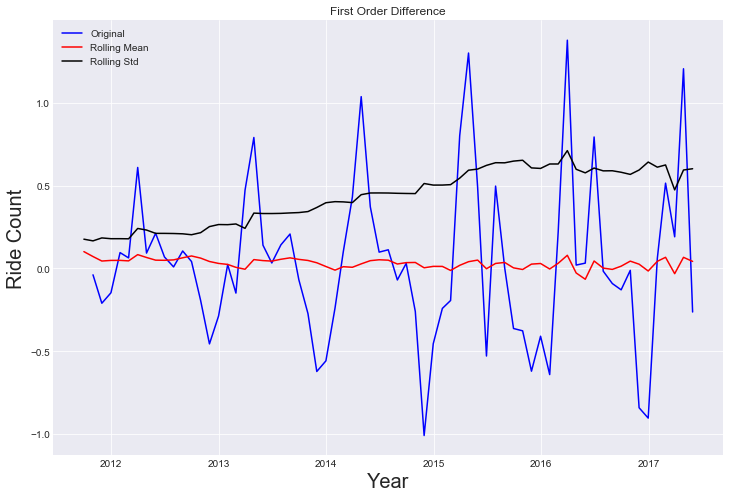

Results of Dickey-Fuller Test:
Test Statistic                 -3.316431
p-value                         0.014160
#Lags Used                     12.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


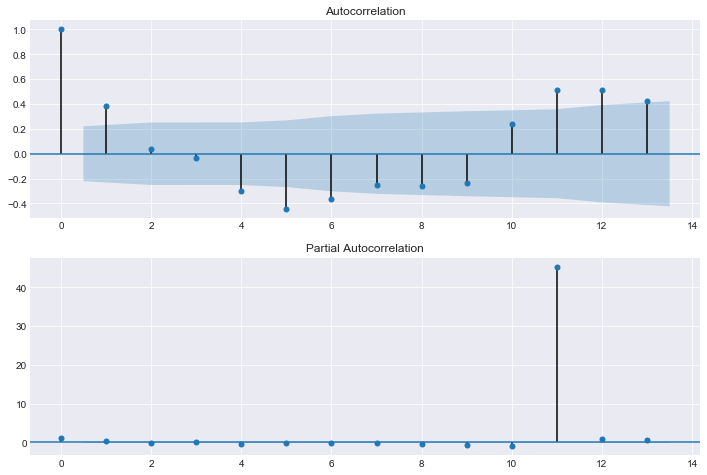

In [8]:
dt.stationarity_autocorrelation_test_first_diff(train_df)

## Second Order Difference 

The purpose of this test is to determine the stationarity and autocorrelarity
 of the second difference.


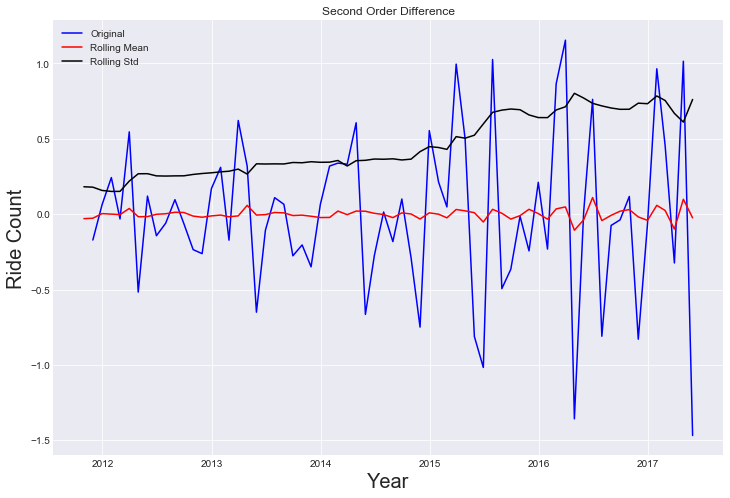

Results of Dickey-Fuller Test:
Test Statistic                -8.753455e+00
p-value                        2.796057e-14
#Lags Used                     1.100000e+01
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64


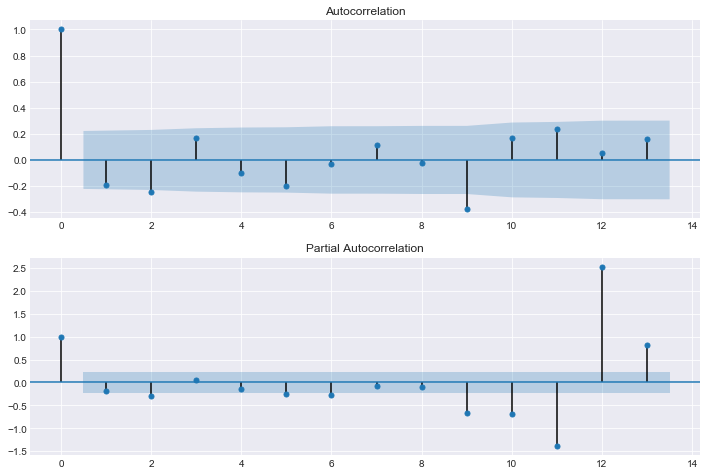

In [9]:
dt.stationarity_autocorrelation_test_second_diff(train_df)

## First Seasonal Difference 

The purpose of this test is to determine the stationarity and autocorrelarity
 of the seasonal difference.


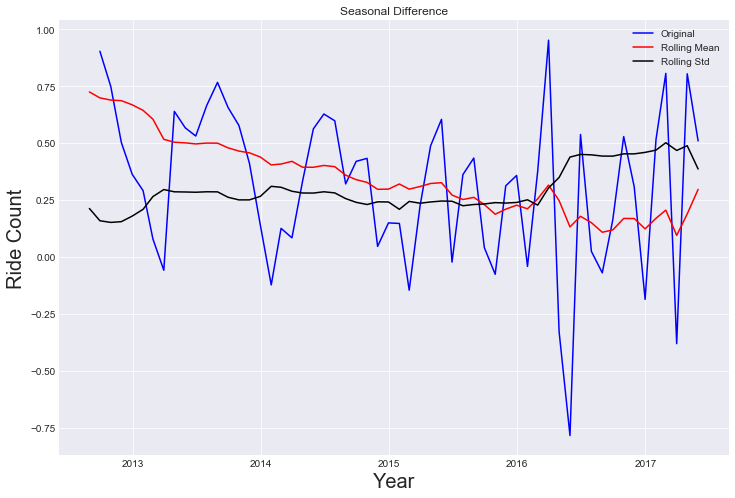

Results of Dickey-Fuller Test:
Test Statistic                 -1.953684
p-value                         0.307243
#Lags Used                      9.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


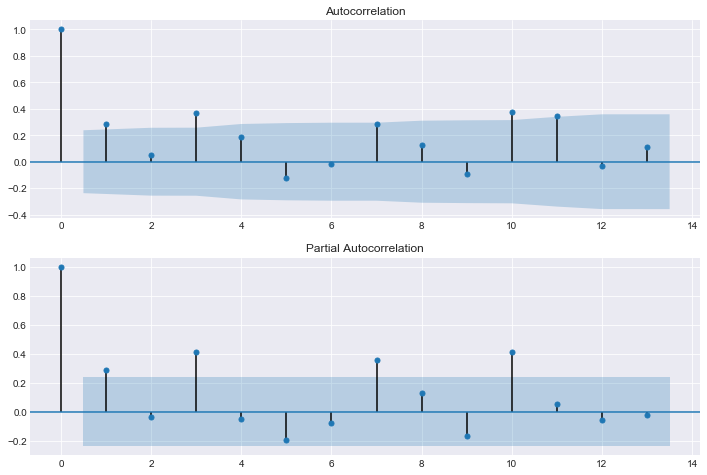

In [10]:
dt.stationarity_test_seasonal_diff(train_df)

## First Seasonal Difference of First Order Difference

The purpose of this test is to determine the stationarity and autocorrelarity
 of the seasonal difference of the first difference.


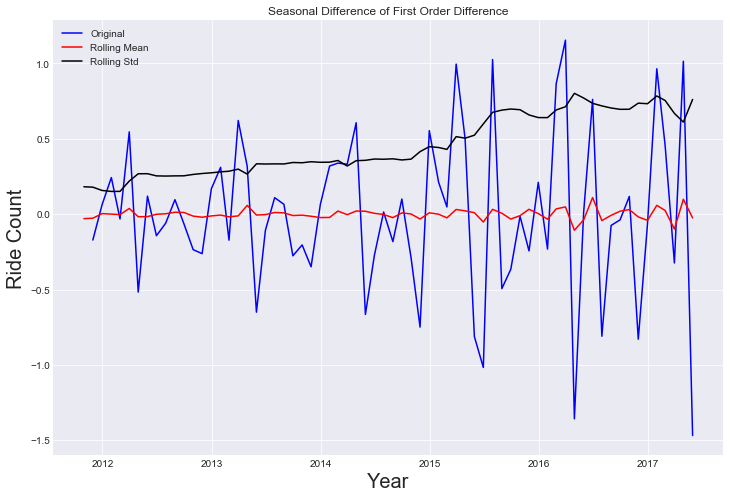

Results of Dickey-Fuller Test:
Test Statistic                -8.753455e+00
p-value                        2.796057e-14
#Lags Used                     1.100000e+01
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64


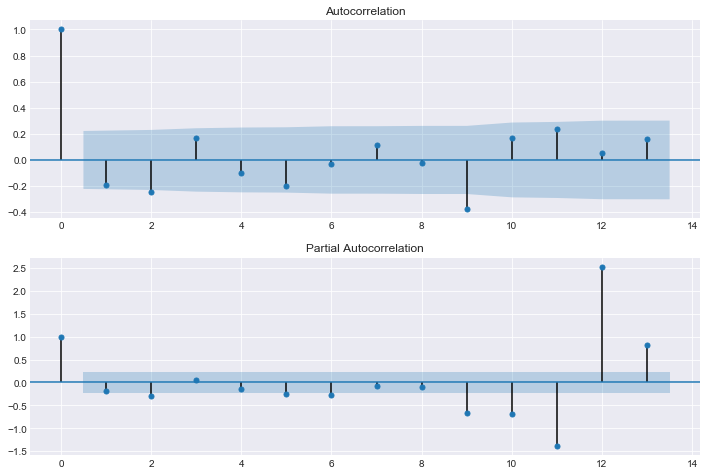

In [11]:
dt.stationarity_test_seasonal_first_diff(train_df)

## This suggests, d = 1, D = 1. Now look at ACF and PACF.

# AFC looks good. PAFC suggests 2 significant lags (p = 2). AFC suggests q = 1- 3.

## Models to try:

#### (2,1,0)(0,1,0,12)
#### (2,1,0)(0,1,1,12)
#### (2,1,0)(1,1,0,12)
#### (2,1,1)(0,1,0,12)
#### (2,1,1)(0,1,1,12)
#### (2,1,1)(1,1,0,12)
#### (2,1,2)(0,1,0,12)
#### (2,1,2)(0,1,1,12)
#### (2,1,2)(1,1,0,12)
#### (2,1,3)(0,1,0,12)
#### (2,1,3)(0,1,1,12)
#### (2,1,3)(1,1,0,12)

The purpose of this test is to determine the model with the best fit
 using Sarima.
                                 Statespace Model Results                                 
Dep. Variable:                              count   No. Observations:                   81
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -803.368
Date:                            Wed, 11 Sep 2019   AIC                           1612.736
Time:                                    12:42:24   BIC                           1619.394
Sample:                                09-30-2010   HQIC                          1615.374
                                     - 05-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4843      0.0

                                 Statespace Model Results                                 
Dep. Variable:                              count   No. Observations:                   81
Model:             SARIMAX(2, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -802.543
Date:                            Wed, 11 Sep 2019   AIC                           1615.087
Time:                                    12:42:27   BIC                           1626.184
Sample:                                09-30-2010   HQIC                          1619.484
                                     - 05-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5969      0.248     -2.410      0.016      -1.082      -0.111
ar.L2         -0.5633      0.129   

                                 Statespace Model Results                                 
Dep. Variable:                              count   No. Observations:                   81
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 12)   Log Likelihood                -802.067
Date:                            Wed, 11 Sep 2019   AIC                           1616.134
Time:                                    12:42:31   BIC                           1629.451
Sample:                                09-30-2010   HQIC                          1621.411
                                     - 05-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5021      0.026    -19.221      0.000      -0.553      -0.451
ar.L2         -1.0000      0.040   

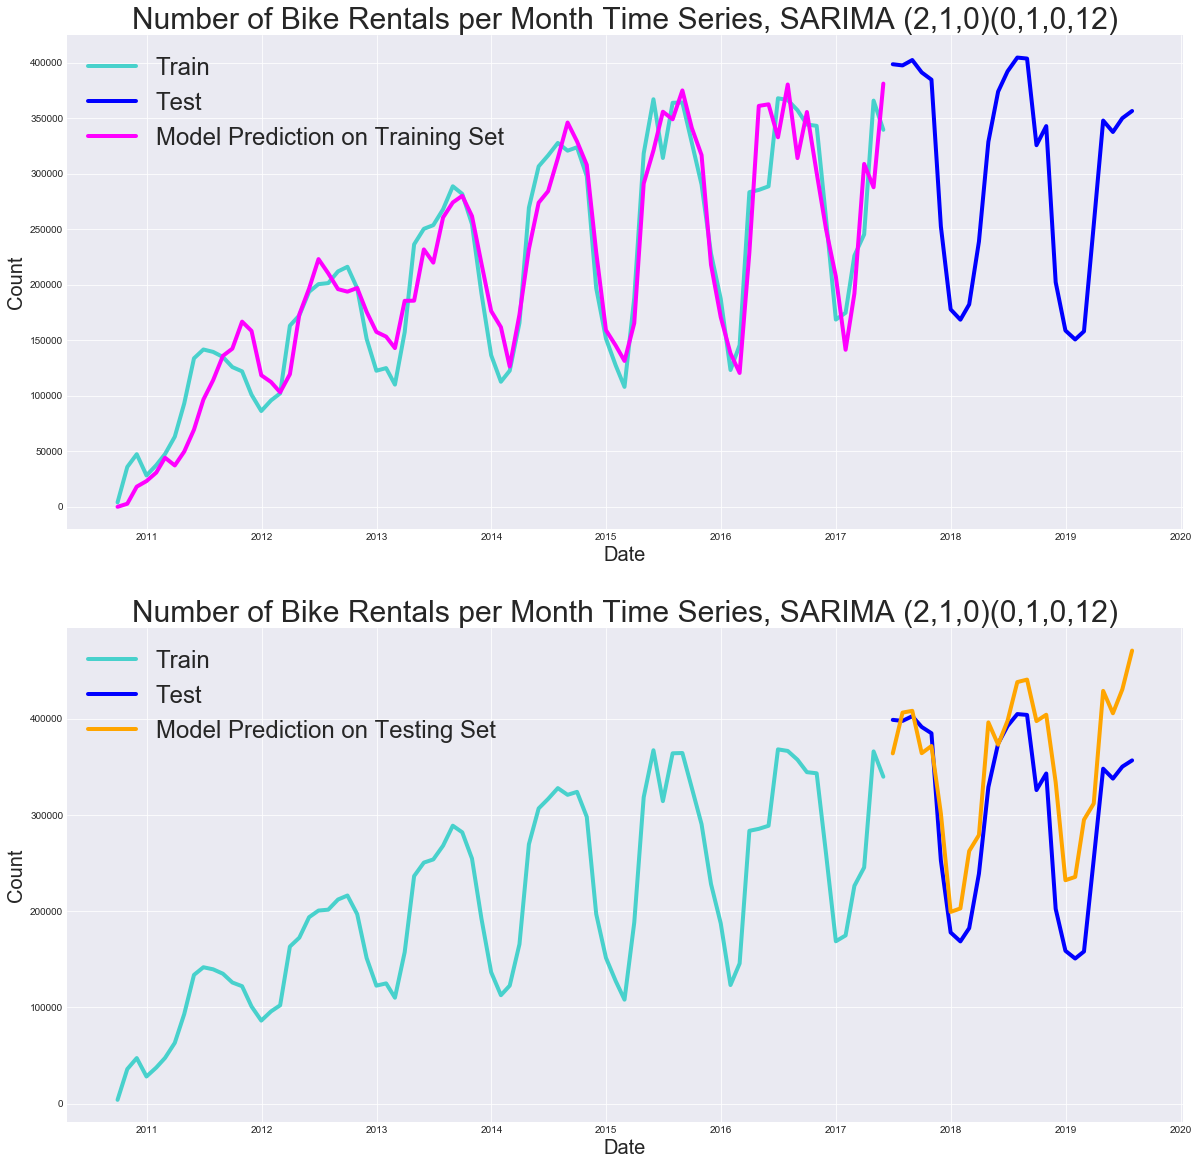

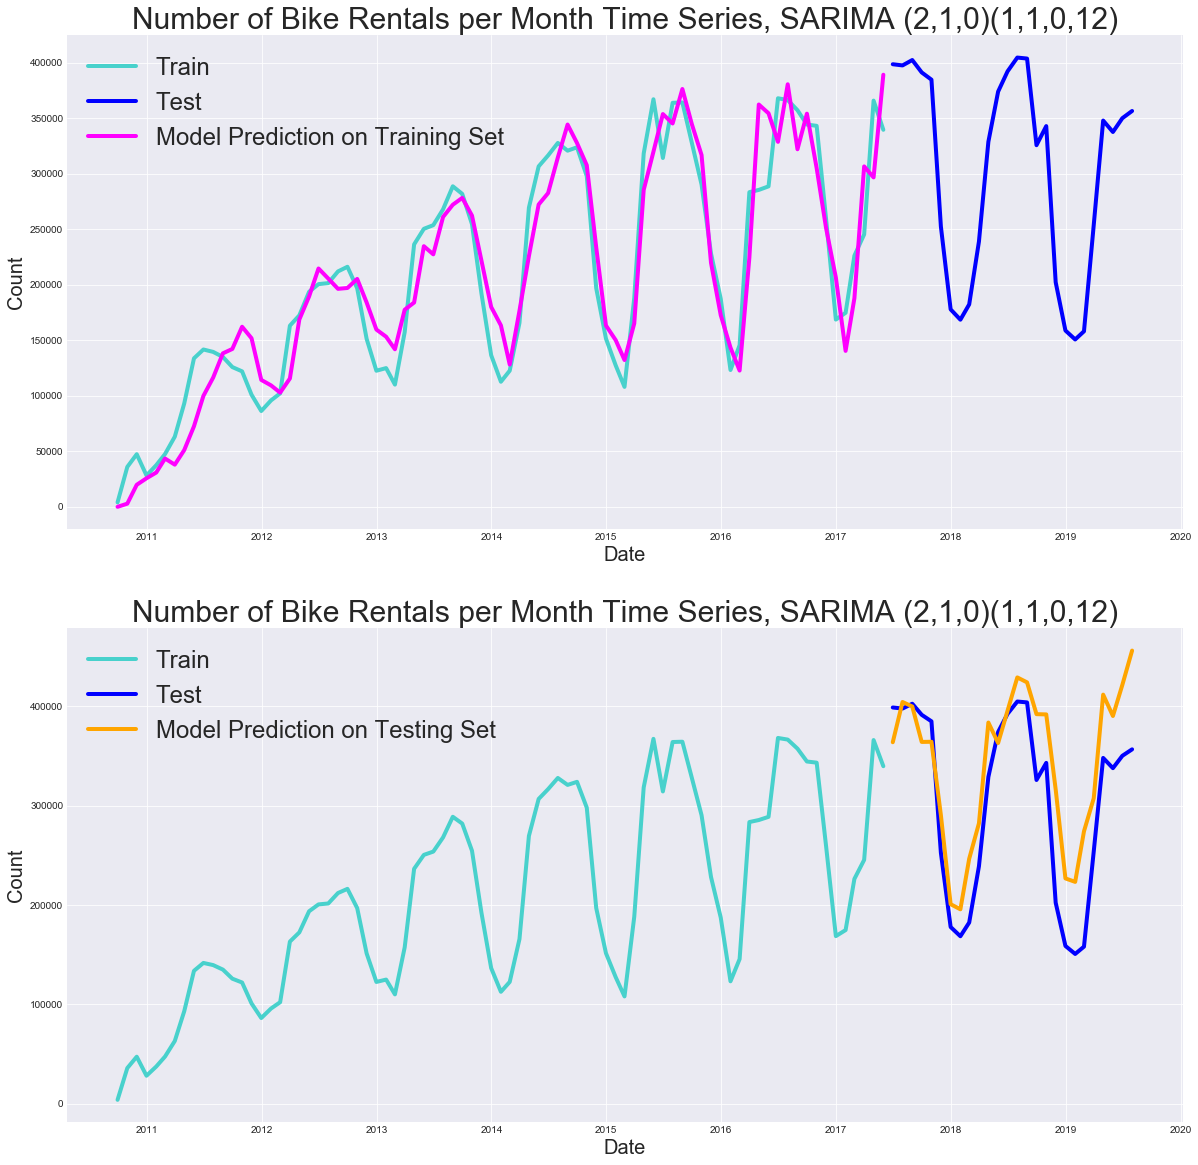

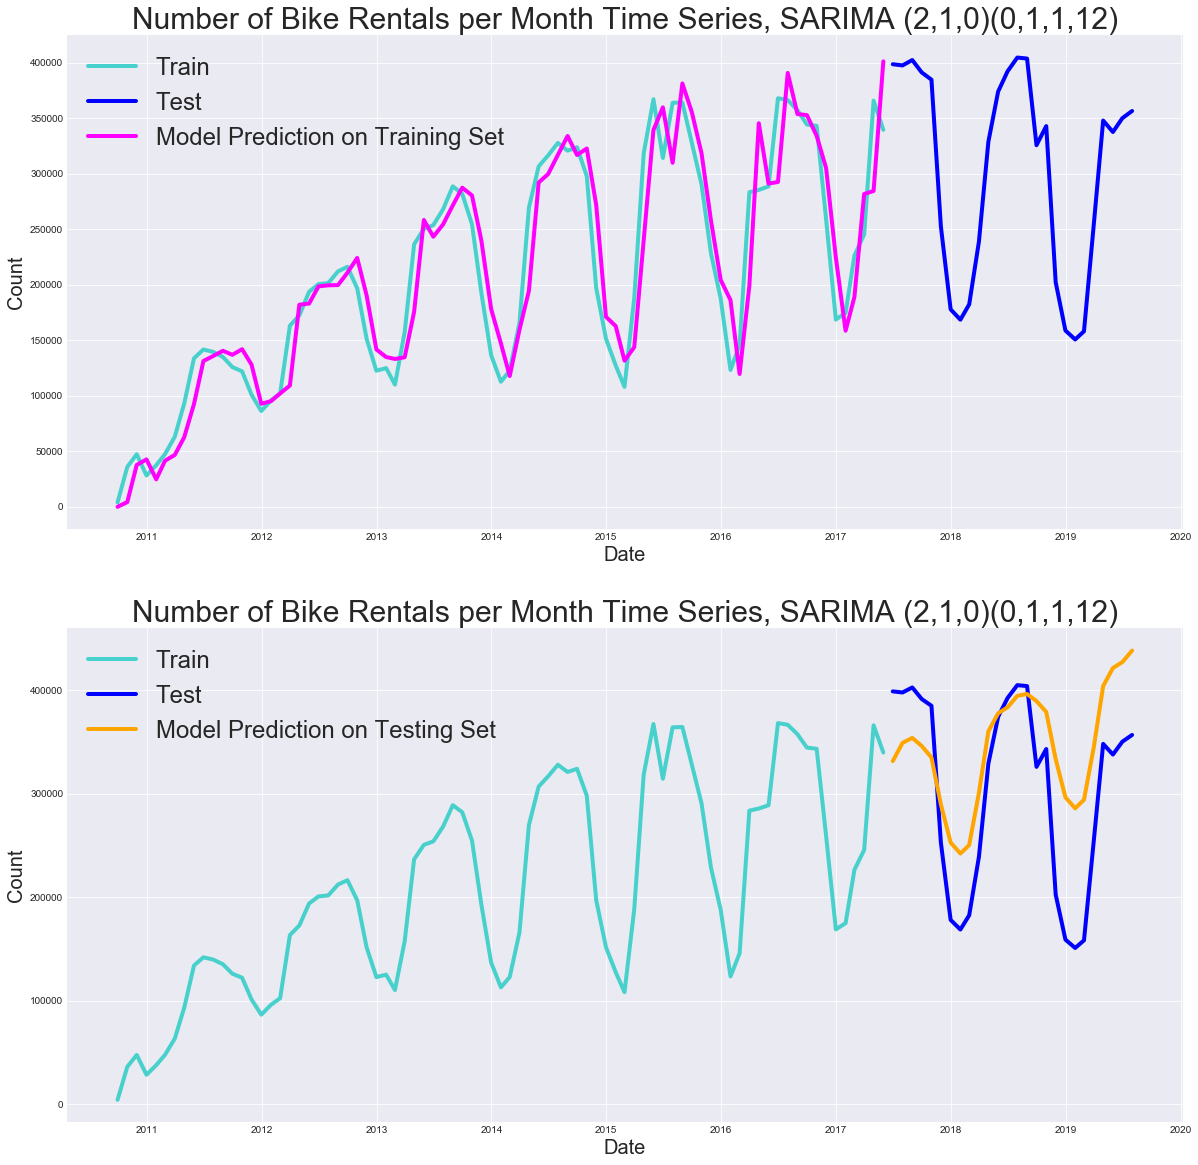

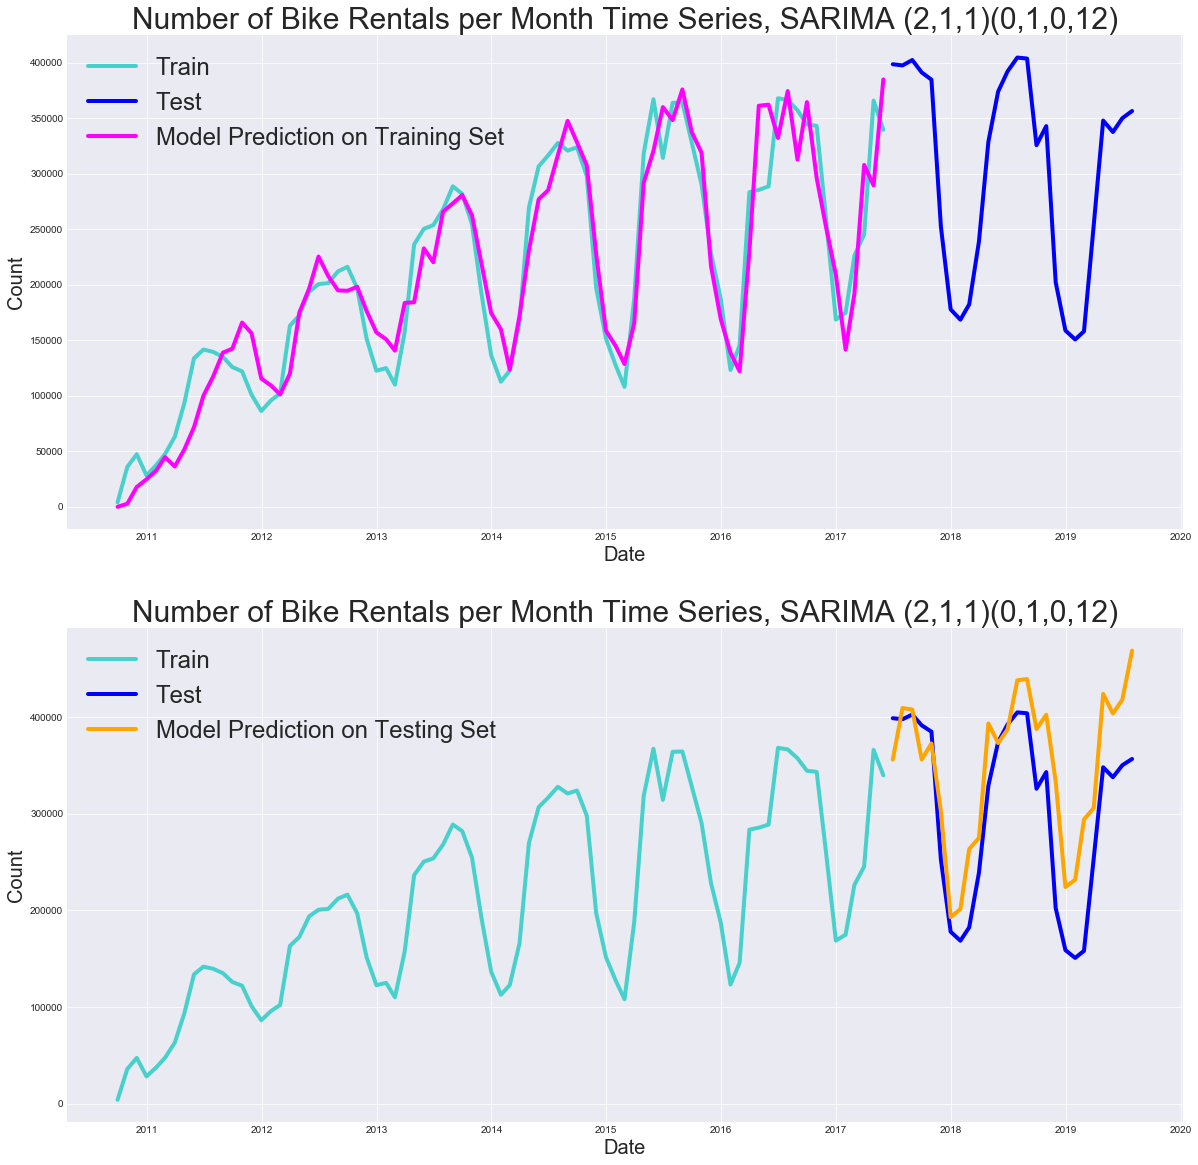

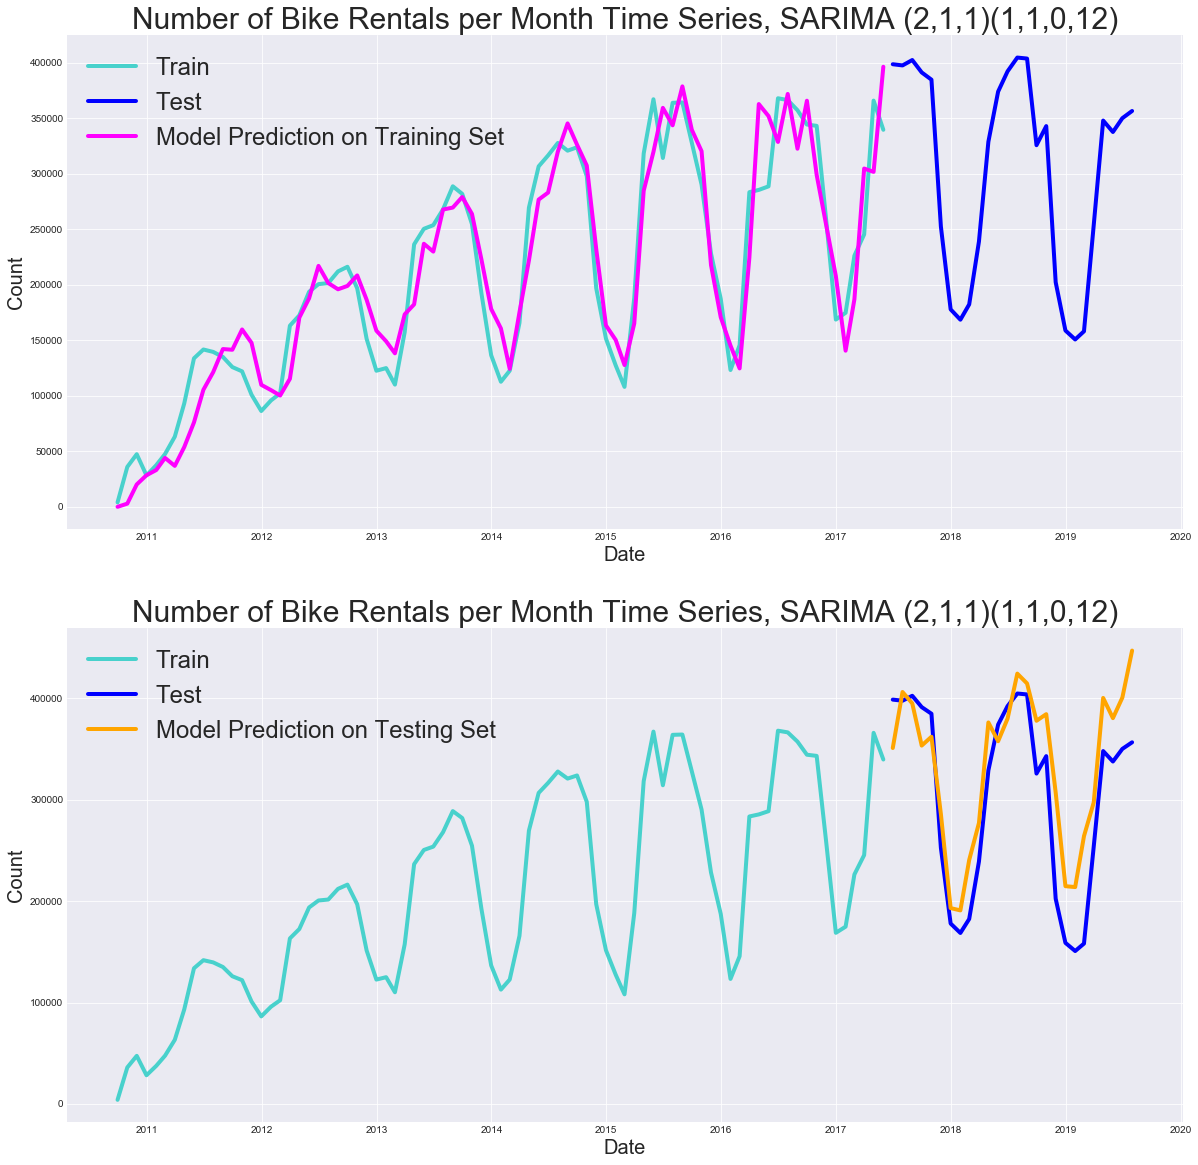

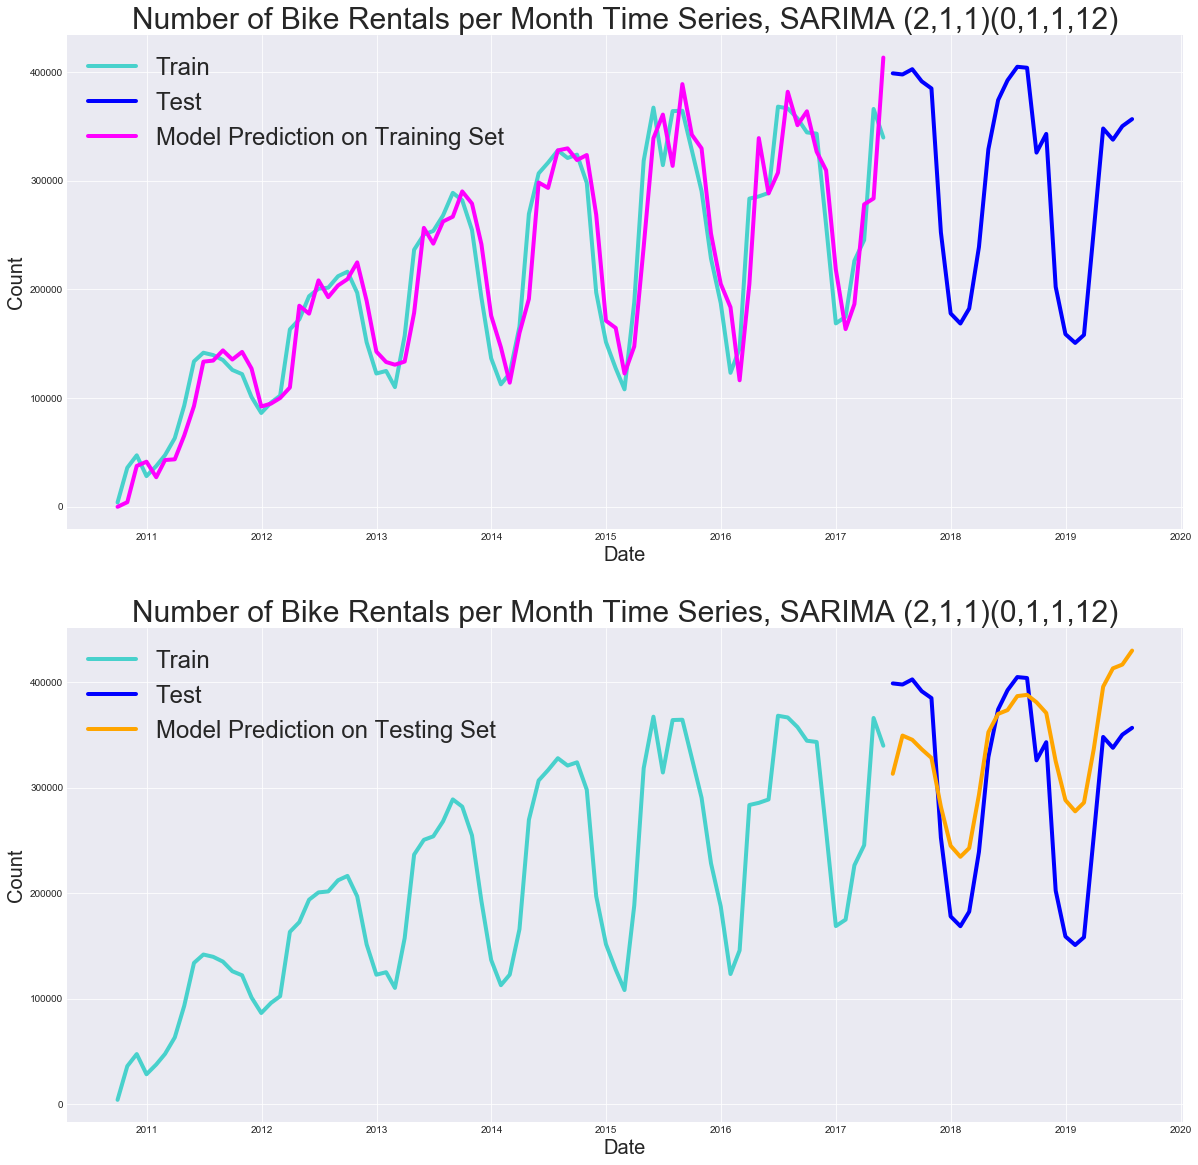

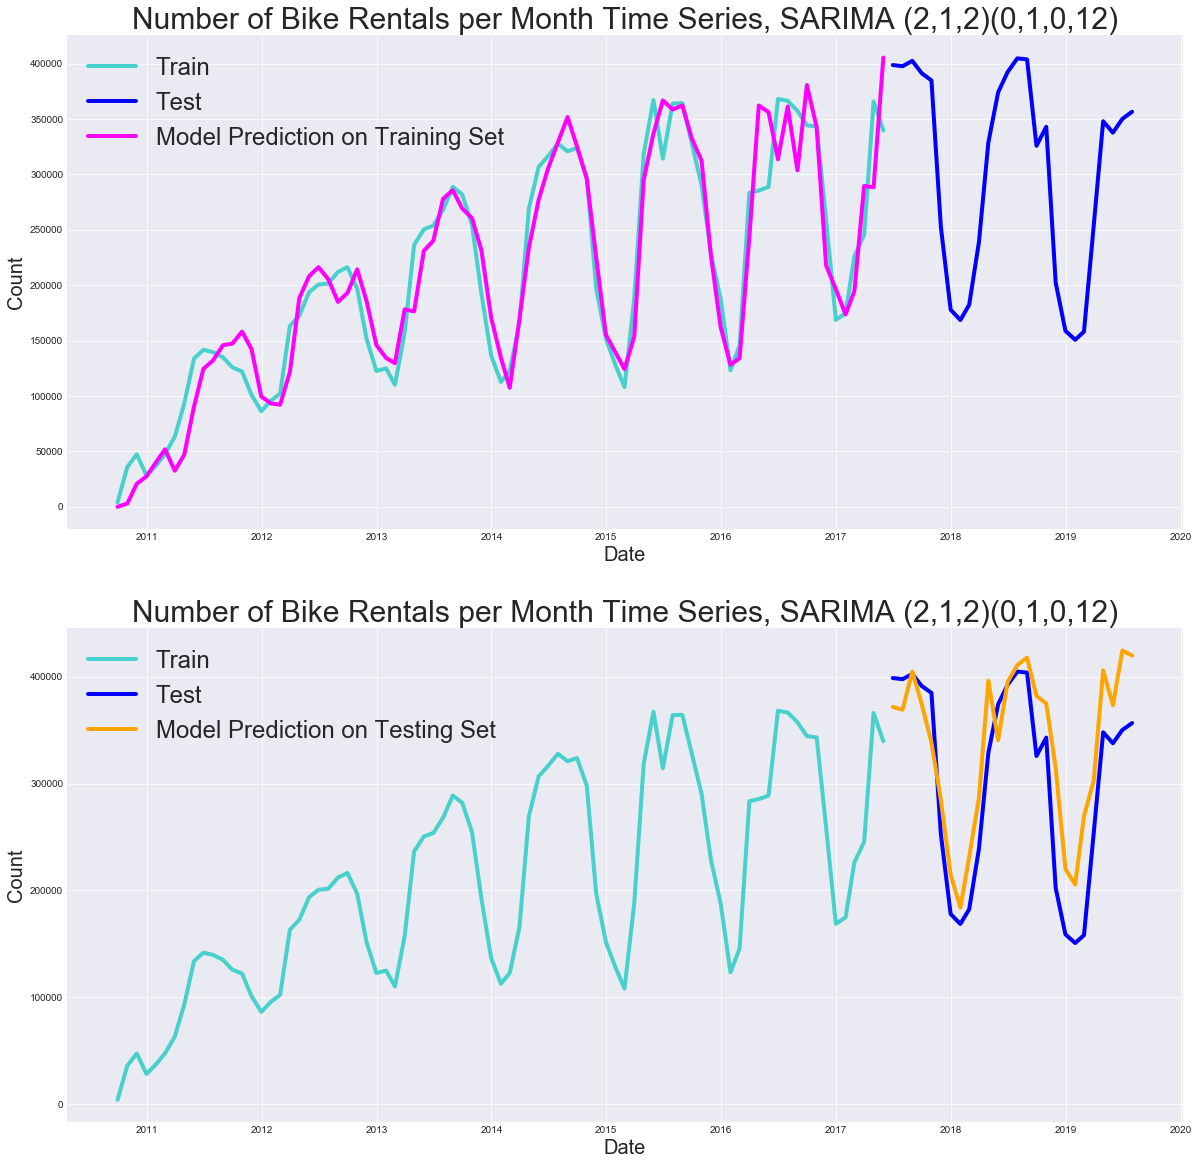

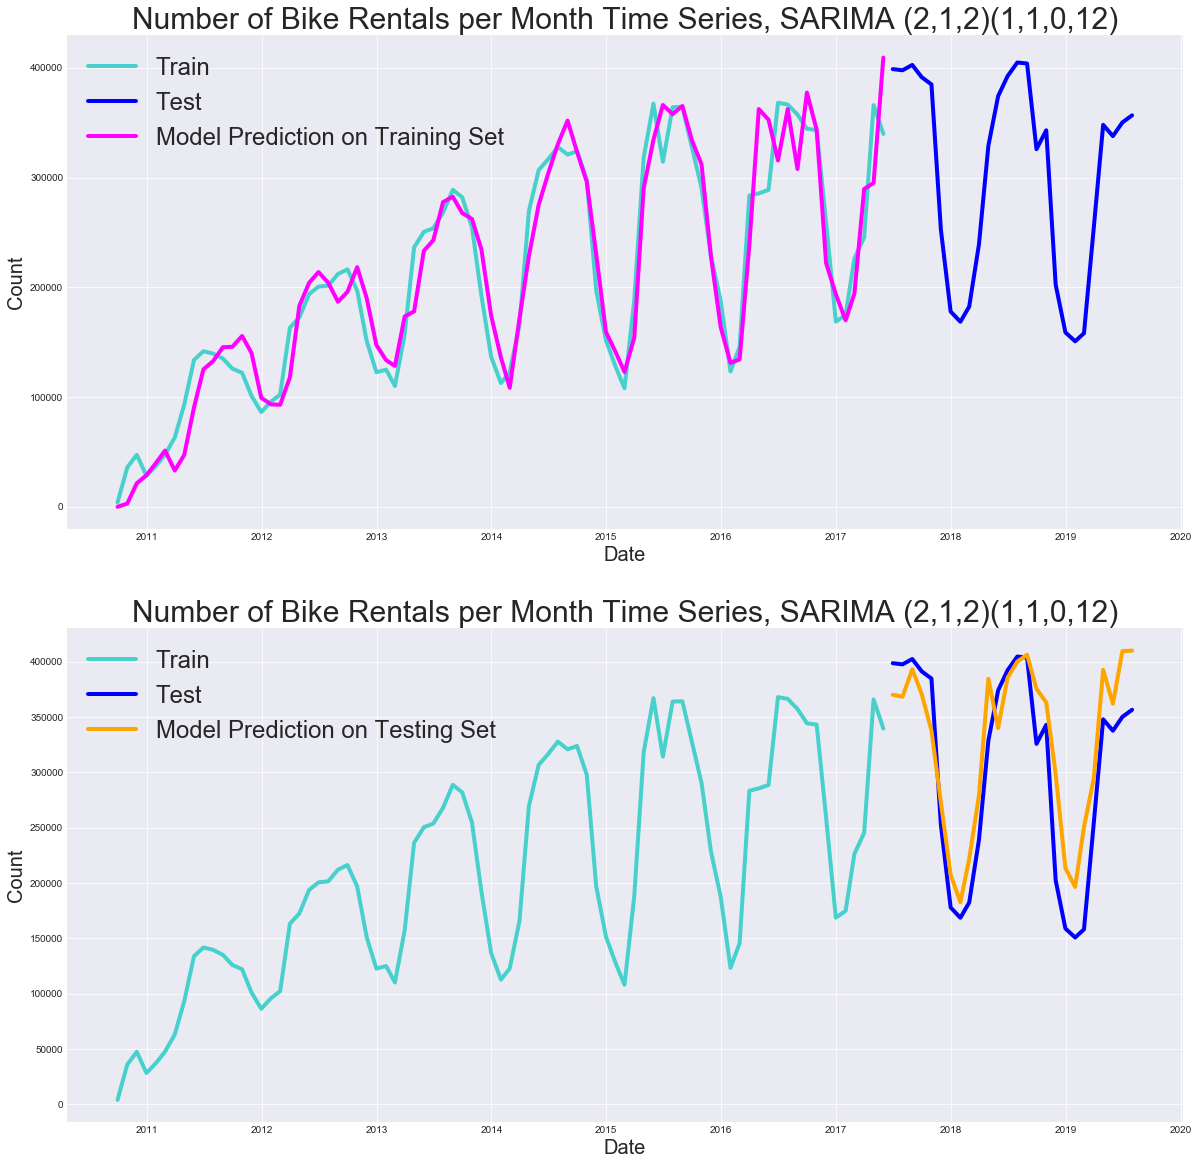

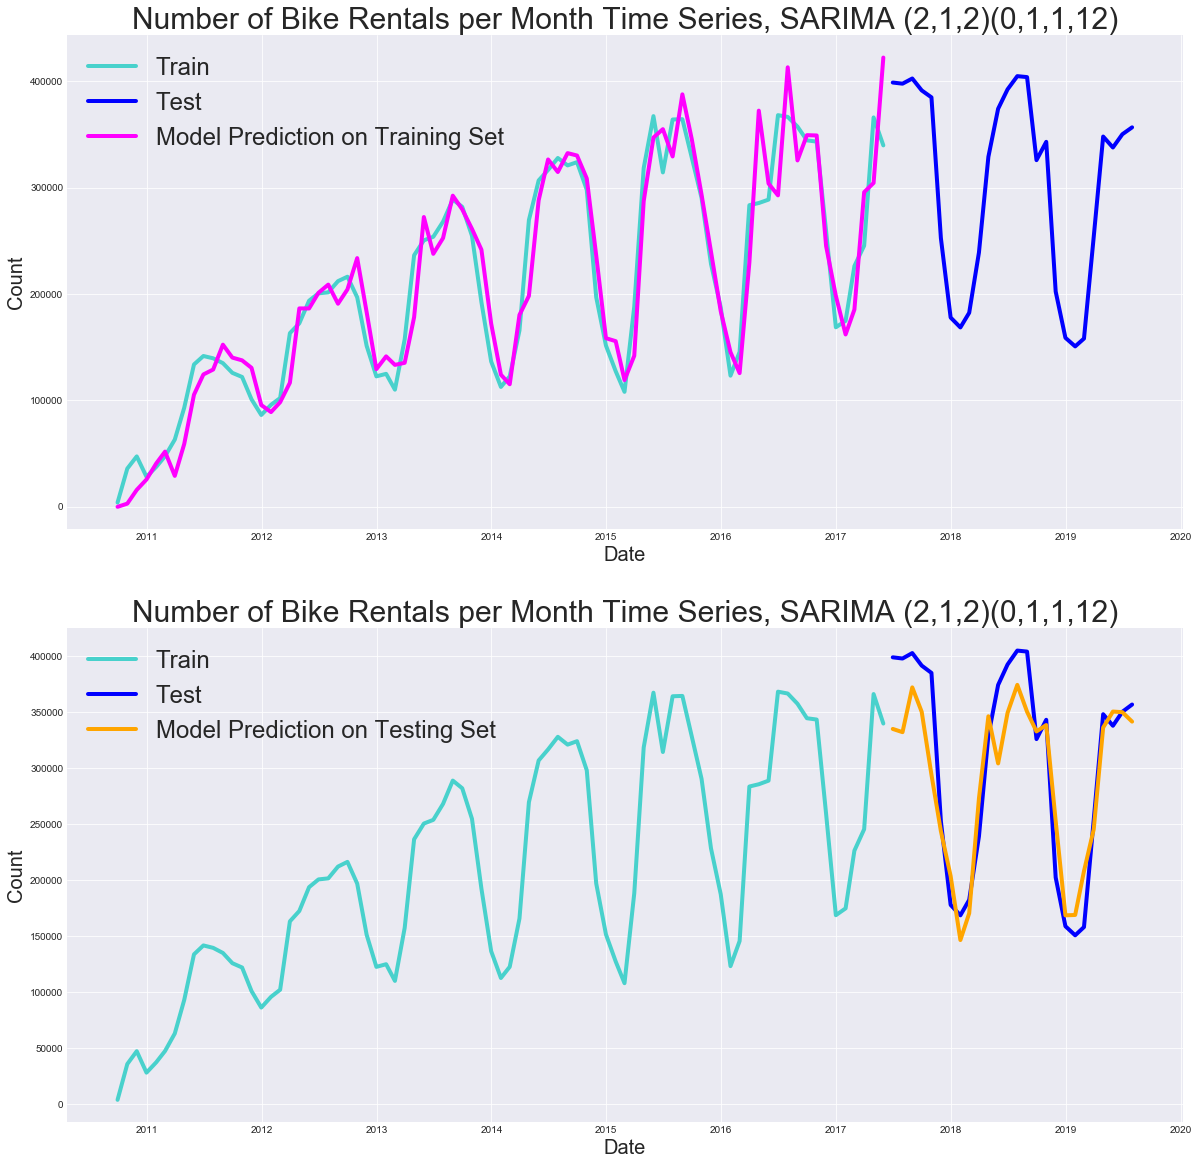

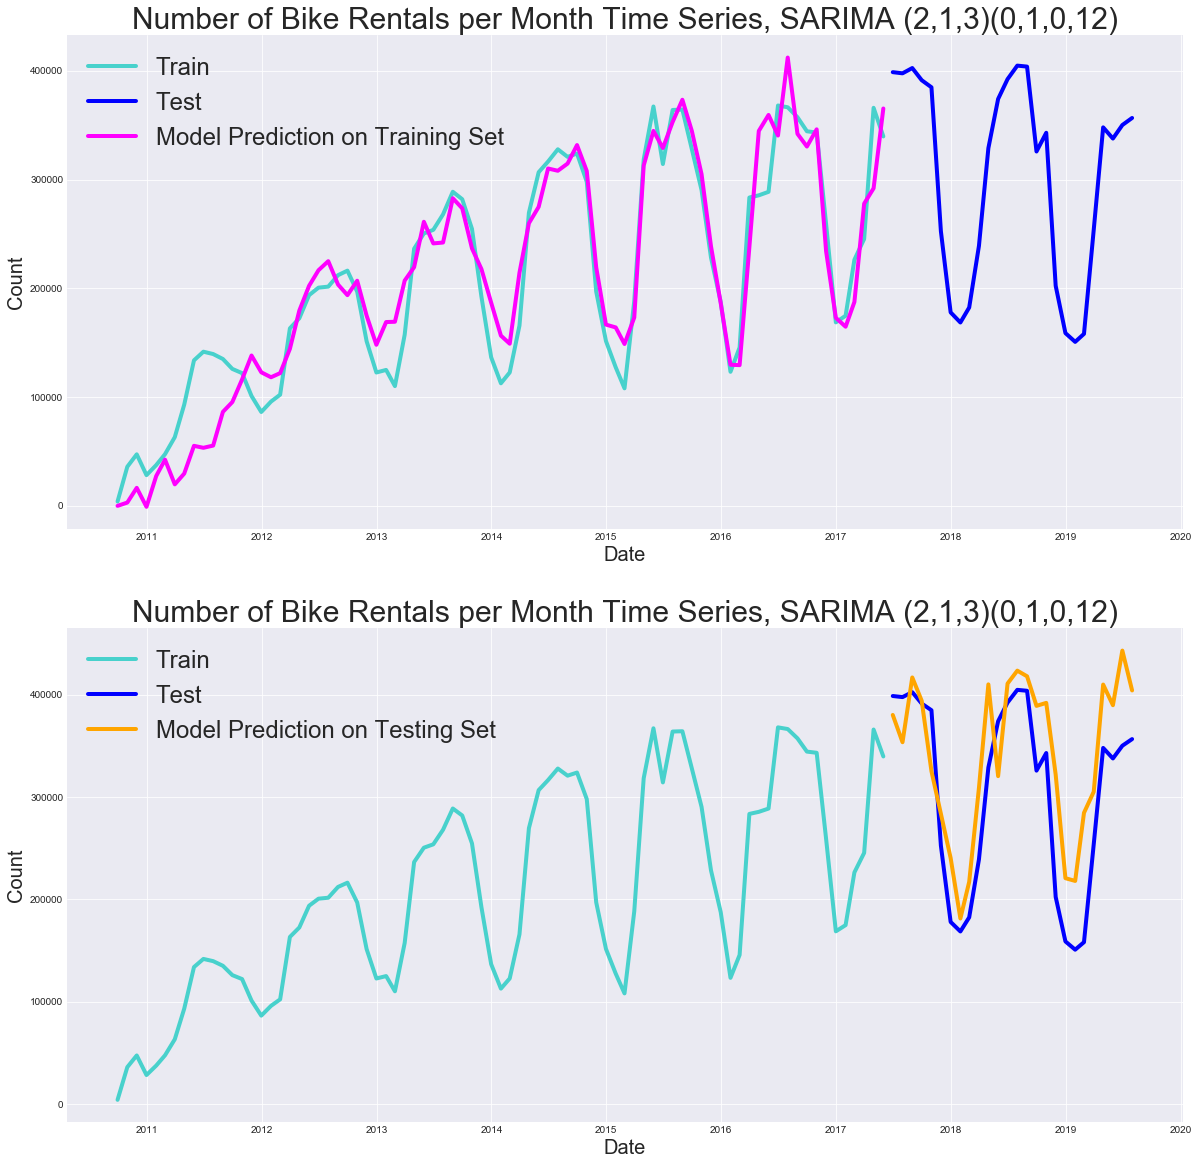

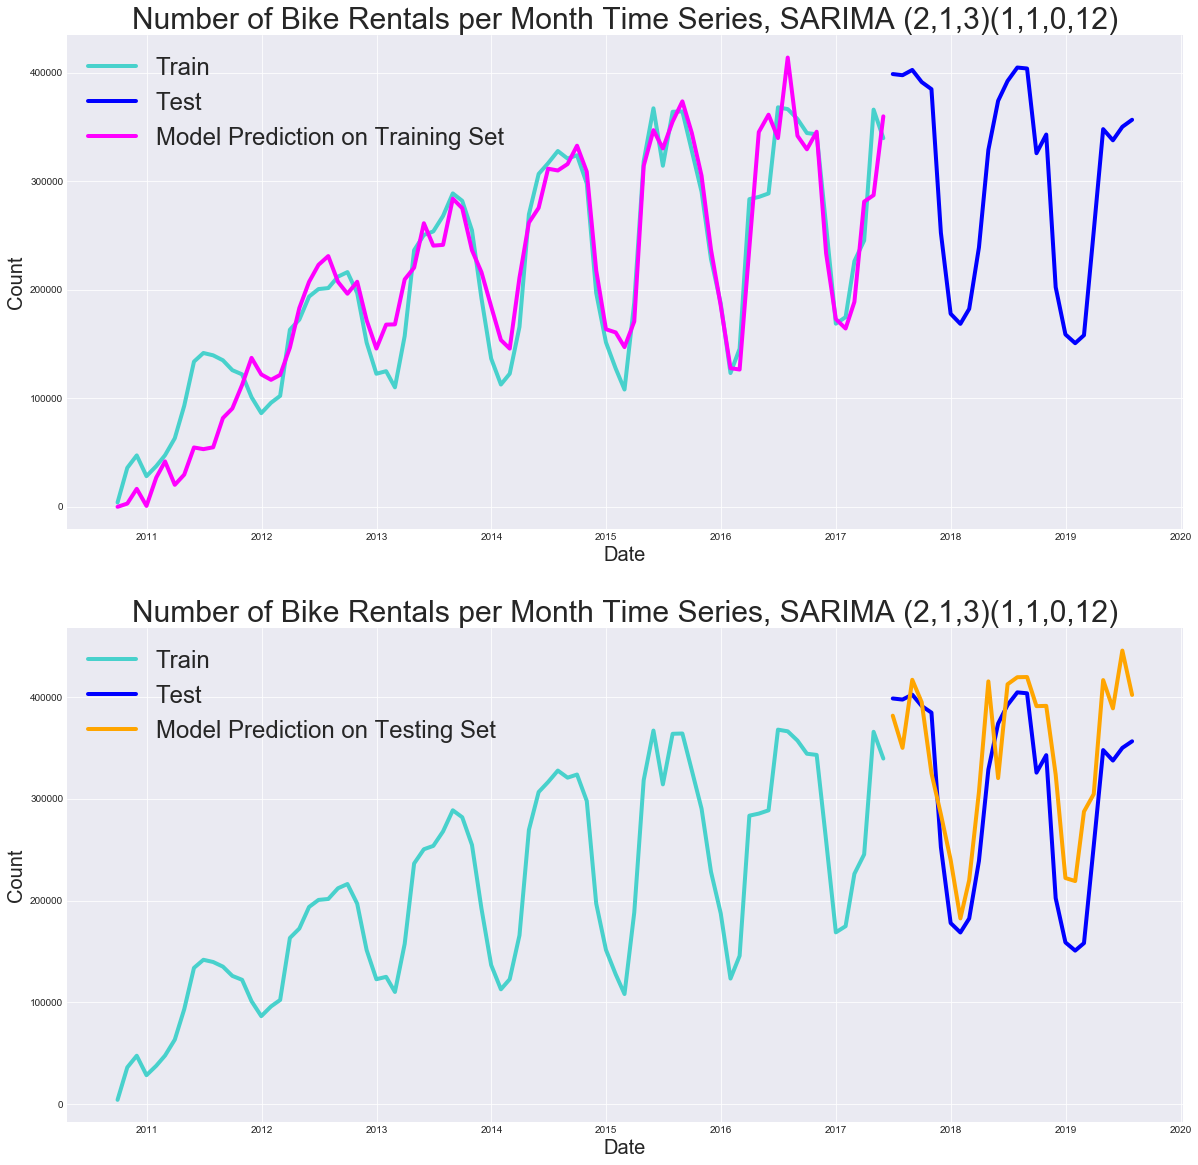

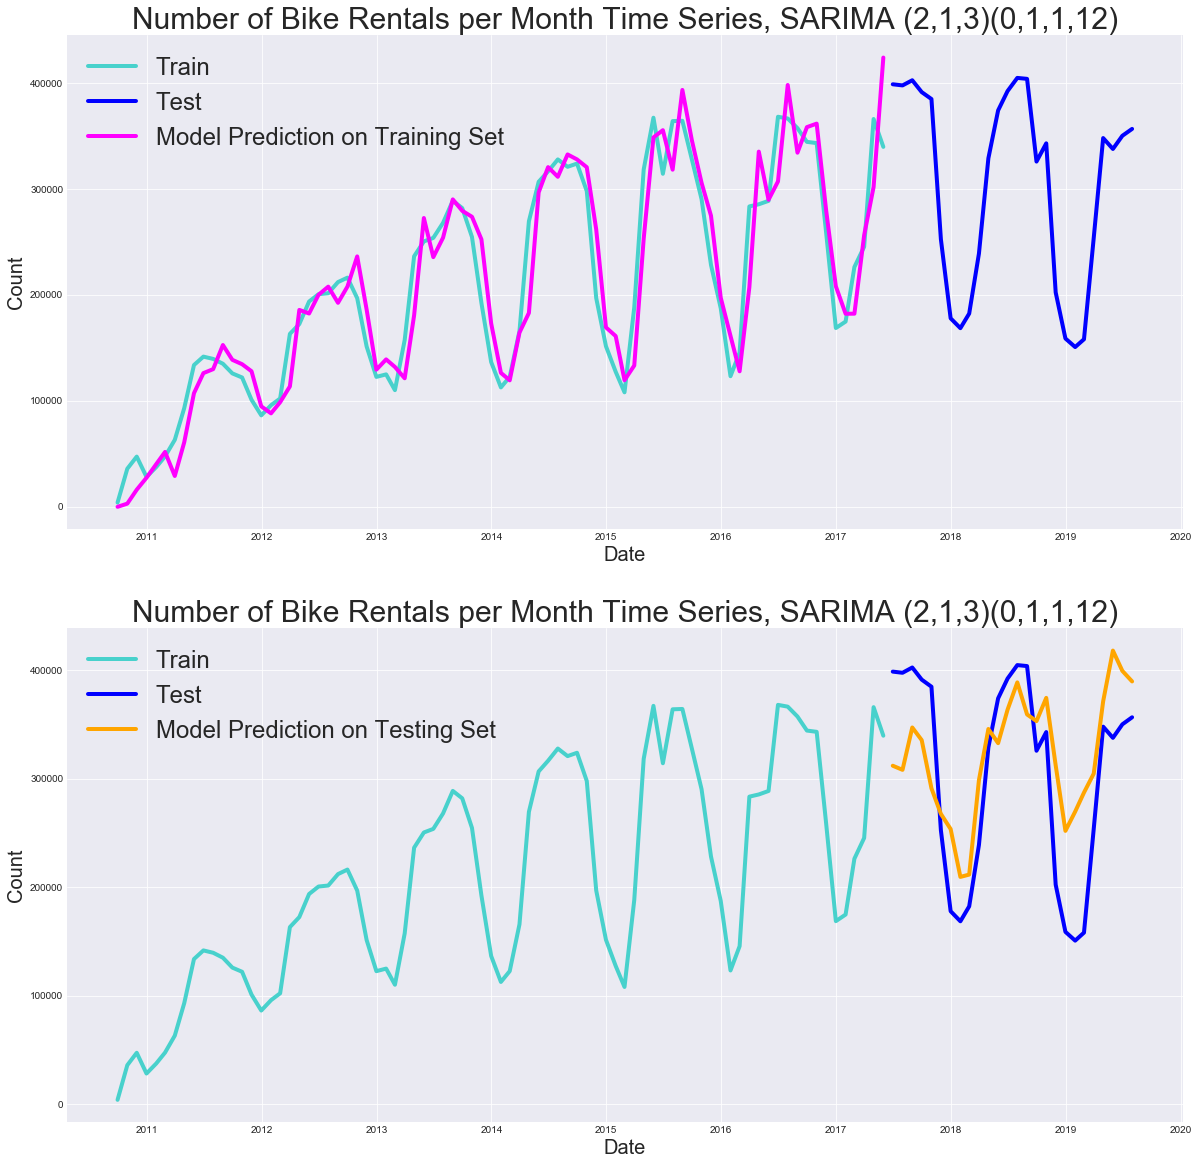

In [12]:
dt.best_model_sarima(train_df, test_df)

## Best two are (2,1,2)(0,1,1,12), and (2,1,2)(1,1,0,12).

12 month forecast for model (2,1,2)(0,1,1,12)


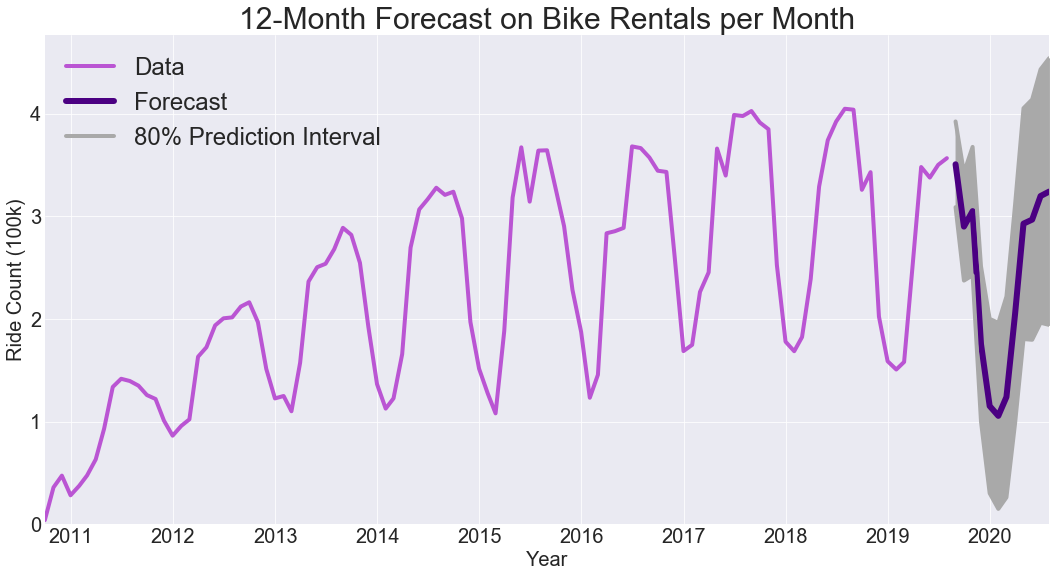

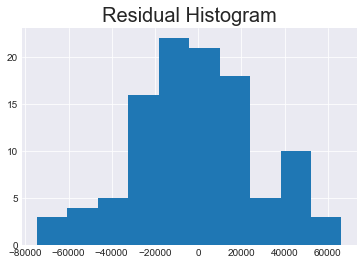

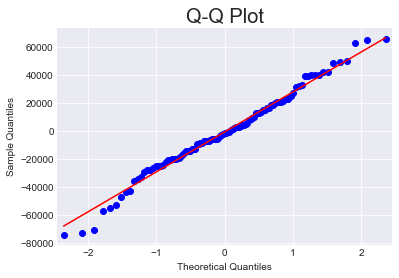

12 month forecast for model (2,1,2)(1,1,0,12)


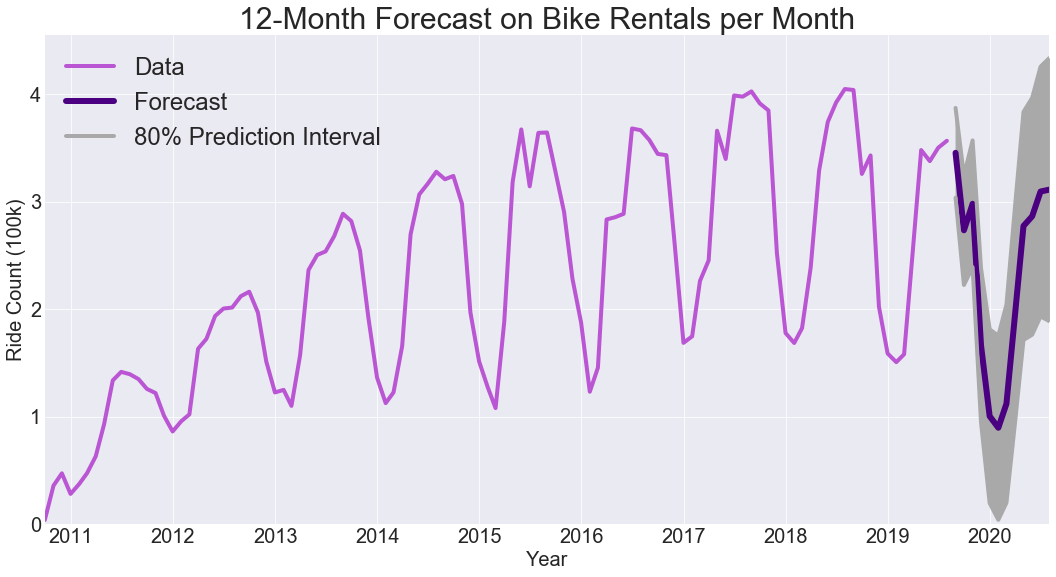

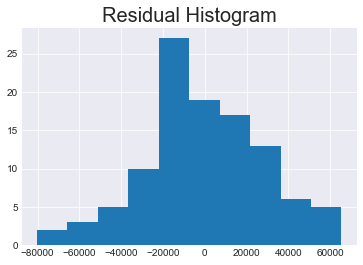

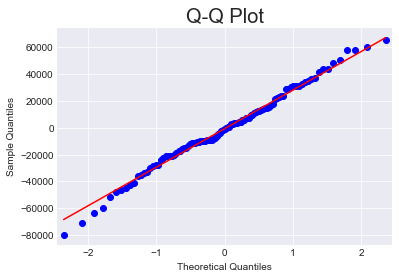

In [22]:
dt.forecast_original(bike_df)

## Residuals look normal for both models.

## Will start with SARIMA (2,1,2) (0,1,1,12) and SARIMA (2,1,2)(1,1,0,12) going forward. Next, look at monthly average weather and precipitation as regressors.